# Trabajo Semanal N°3
<img src="logo_UTN.svg" title="Logo UTN" align="right" width="150"> 

## Teoría de Circuitos II
### Alumno: Federico Albero
### Curso: R4001

#### Plantilla de diseño del filtro:
<img src="plantilla_filtro.png" title="Consigna" align="left" width="400"> 

#### Resolución analítica ejercicios 1, 2, 3, 4, 5 y Bonus I:

In [1]:
from IPython.display import IFrame
IFrame("./TS3_FAlbero_R4001_Completa.pdf", width=1000, height=1000)

#### Bonus II: Simulaciones numéricas y circuitales

<p style="text-align: center;">Simulaciones numéricas</p>

Num1:  [1.96522673]
Denum1:  [1.         2.50515278 3.13789522 1.96522673]
Num2:  [1.9652267283602716]
Denum2:  [1, 2.5051527763620527, 3.1378952164572507, 1.9652267283602716]


#### Maxima-Planicidad_orden-3_ripple_1dB

<IPython.core.display.Math object>

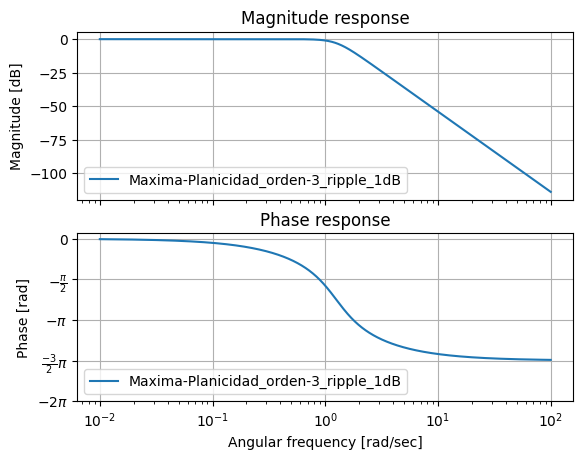

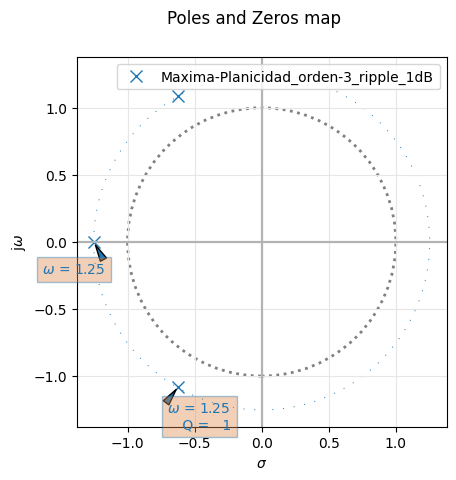

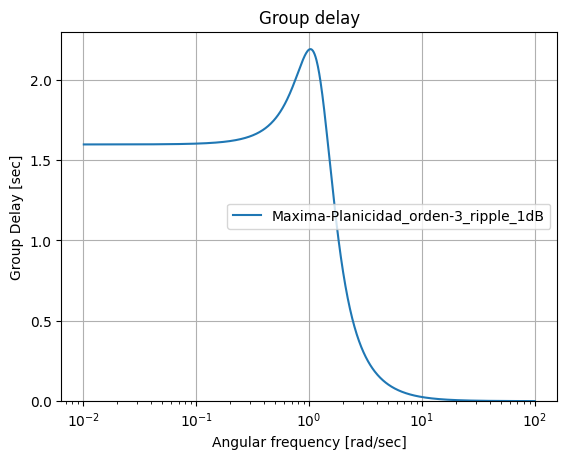

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May 10 11:44:08 2023

@author: fede23
"""

#%% Trabajo Semanal 3 - Verificación con simulación numérica %%#

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
# import matplotlib as mpl

from pytc2.sistemas_lineales import analyze_sys, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_subtitle

# esto dejarlo así, no tocar, es para graficar
all_sys = []
filter_names = []

#%% Desarrollo %%#

# Valores plantilla de diseño:
alpha_max = 1
alpha_min = 12
wp = 1
ws = 2
n = 3

ee = (10**(alpha_max/10) - 1) # epsilon²
e = np.sqrt(ee) # epsilon
alpha_min_n3 = 10*(np.log10(1 + (ee)*(ws**(2*n)))) ##alpha_min_n3 > 12dB -> n=3
wb = e**(-1/n) # coeficiente de renormalización Butter --> MP

# obtengo ceros, polos y ganancia de un Butter de orden n
z1,p1,k1 = sig.buttap(n) 
# obtengo num y denum correspondiente a los z,p,k anteriores
num1, den1 = sig.zpk2tf(z1,p1,k1) 
# Renormalización de la transferencia, paso de Butter a MP usando Wb
num1, den1 = sig.lp2lp(num1, den1, wb) 
# Obtengo z,p,k de la transferencia en MP finalmente
z1,p1,k1 = sig.tf2zpk(num1, den1) 

# Verifico lo obtenido analíticamente en hoja y papel
num2 = [e**(-1)]
den2 = [1, 2*e**(-1/3), 2*e**(-2/3), e**(-1)] # Se verifica que den1 = den2
z2,p2,k2 = sig.tf2zpk(num2, den2)

# Comparo los resultados y los imprimo
print("Num1: ", num1)
print("Denum1: ", den1)
print("Num2: ", num2)
print("Denum2: ", den2)

# Emprolijo los gráficos de salida (copiar tal cual)
all_sys.append(sig.TransferFunction(num1,den1))
label = 'Maxima-Planicidad' + '_orden-' + str(n) + '_ripple_' + str(alpha_max) + 'dB' # etiqueta
print_subtitle(label)
# factorizamos en SOS's
this_sos = tf2sos_analog(num1, den1)
pretty_print_SOS(this_sos, mode='omegayq')
filter_names.append(label)

plt.close('all') # cierro todo antes de graficar nuevamente por las dudas
analyze_sys( all_sys, filter_names)


**Análisis)** Mediante la presente simulación, se pudieron verificar los siguientes aspectos obtenidos previamente de manera analítica:
* Valores de los coeficientes del numerador y denominador a través de distintos caminos.
* Diagrama de polos y ceros con la ubicación de las singularidades.
* Gráfico de módulo $|T_{(w)}|$ y fase $\varphi_{(w)}$ de la función transferencia.
* Descomposición de transferencia de orden n=3 en una sección de orden orden 2 y otra de orden 1.

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

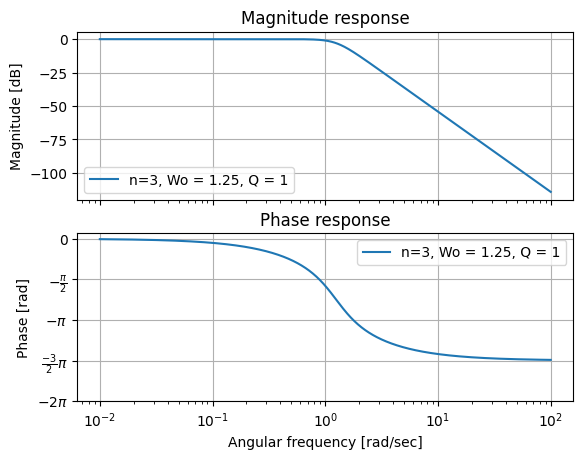

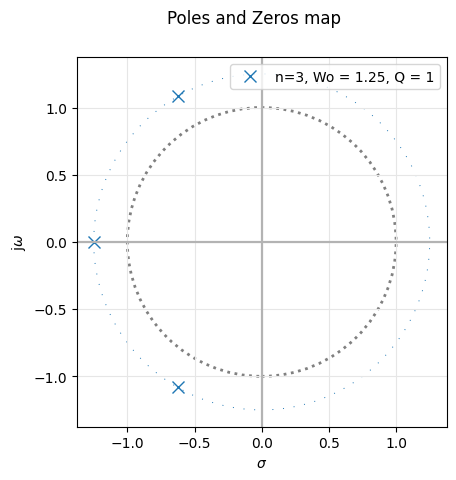

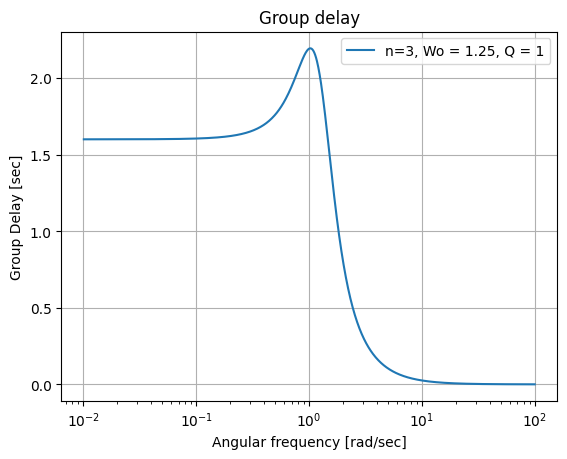

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May 10 18:51:16 2023

@author: fede23
"""

#%% Trabajo Semanal 3 - Simulación red pasiva normalizada %%#

from scipy.signal import TransferFunction
from pytc2.sistemas_lineales import pzmap, bodePlot, GroupDelay
import numpy as np

# R-L-C Serie, salida por C
# Transferencia T1(S) =  ( Wo² ) / ( S² + Wo/Q + Wo² )
# Wo² = 1/(L*C)
# Wo/Q = R/L

# R-C Serie, salida por C
# Transferencia T2(S) = ( 1/(R*C) ) / ( S + 1/(R*C) )

# Valores componentes (normalizados):
R = 1
L = 0.8
C = 0.8

# Transferencia RLC
num1 = [( 1/(L*C) )]
den1 = [1, (R/L), ( 1/(L*C) )]
# Transferencia RC
num2 = [( 1/(R*C) )]
den2 = [1, ( 1/(R*C) )]

# tf1 = TransferFunction( [num1],  [den1]) # Transferencia RLC
# tf2 = TransferFunction( [num2], [den2] ) # Transferencia RC
# Intento realiazr el siguiente producto de funciones transferencias
# tf = tf1*tf2 a través de la función polymul(), multiplicando los numeradores
# y denominadores respectivamente
num = np.polymul( num1, num2 )
den = np.polymul( den1, den2 )

tf = TransferFunction( num, den )

# Grafico la función transferencia
bodePlot(tf, fig_id=1, filter_description = 'n=3, Wo = 1.25, Q = 1')
pzmap(tf, fig_id=2, filter_description = 'n=3, Wo = 1.25, Q = 1')
GroupDelay(tf, fig_id=3, filter_description = 'n=3, Wo = 1.25, Q = 1')

**Análisis)** Con esta segunda simulación numérica se intenta demostrar como se puede conformar una transferencia de orden n=3 en base a una sección de segundo orden y otra de primer orden. Al momento de implementar esta red circuital utilizando estructuras pasivas, se escogió una topología RLC serie - salida por C - para la sección de orden 2 y otra RC serie - salida por C - para la de orden 1.

<p style="text-align: center;">Simulaciones circuitales</p>

#### _Red pasiva:_

##### Circuito
<img src="TS3_red-pasiva_circuito.png" title="Red pasiva"> 

##### Grafico
<img src="TS3_red-pasiva_grafico.png" title="Red pasiva"> 

**Observaciones:** 
* En $f=f_p=1500Hz$, frecuencia que delimita el fin de la banda de paso, tengo una atenuación de aproximadamente 1dB.
* En $f=f_s=3000Hz$, frecuencia en la cual comienza la banda de detención (stop), tengo una atenuación mayor a los 12dB especificados en la plantilla.
* Al ser una transferencia de orden n=3, obtendré una atenuación de $20\cdot n\, dB/dec = 60\,dB/dec$
* Máxima planicidad en la banda de paso.

#### _Red pasiva - activada (normalizada):_

##### Circuito
<img src="TS3_red-pasiva-activada-normalizada_circuito.png" title="Red pasiva - activada (normalizada)"> 

##### Grafico
<img src="TS3_red-pasiva-activada-normalizada_grafico.png" title="Red pasiva - activada (normalizada)"> 

**Observaciones:** 
* Se "activa" el circuito utilizando la transformación de Bruton con el objetivo de obtener una red circuital constituida solamente por resistores, capacitores y OPAM' S, omitiendo así los inductores.
* Al estar trabajando con los componentes normalizados, tanto en frecuencia como en impedancia, la frecuencia de paso $f_p=1500Hz$ ahora se encuentra en $w_p=1\,rad/sec$ y la de "stop" en $w_s=2\,rad/sec$.
* Como LTSpice grafica los ejes frecuenciales en Hertz [Hz], para obtener las frecuencias angulares anteriores debo realizar las siguientes conversiones: $f_{p(normalizada)}=\frac{1}{2\pi}=159.15mHz$ y $f_{s(normalizada)}=\frac{2}{2\pi}=318.31mHz$.
* Se verifican las especificaciones de la plantilla tanto en la banda de paso como en la de atenuación.
* A medida que aumenta la frecuencia, se puede observar una deformación tanto en el módulo de la transferencia como en su fase. Esto es atribuible al producto ganancia-anchi de banda (GMW), característica de un amplificador operacional real y no ideal.

#### _Red pasiva - activada (desnormalizada):_

##### Circuito
<img src="TS3_red-pasiva-activada_circuito.png" title="Red pasiva - activada (desnormalizada)"> 

##### Grafico
<img src="TS3_red-pasiva-activada_grafico.png" title="Red pasiva - activada (desnormalizada)"> 

**Observaciones:** 
* Se desnormalizan los valores de los componentes de la red circuital anterior con el objetivo de utilizar solamente capacitores de 100nF.
* Se verifican nuevamente las especificaciones de la plantilla de diseño: $|T_{(f=1500Hz)}|\cong-1dB$, $|T_{(f=3000Hz)}|\gg -12dB$ y atenuación de 60dB/dec en la banda de atenuación.

#### _Red activa:_

##### Circuito
<img src="TS3_red-activa_circuito.png" title="Red activa"> 

##### Grafico
<img src="TS3_red-activa_grafico.png" title="Red activa"> 

**Observaciones:**
* Otra manera de activar la red circuital sería reemplazando al sección de segundo orden RLC serie por una topología Ackerberg-Mossberg, la cual es una topología conocida y ya estudiada previamente.
* La sección de primer orden RC se mantiene sin cambios, ya que es necesaria para poder conformar la transferencia de orden n=3 ya que me aporta un polo en el eje real (semi plano izquierdo). La configuración Ackerberg-Mossberg me aporta un par de polos complejos conjugados.